# About
- Date: 01/10/2022
- Pages: 81, 82

## Exercise 1
- $f(x)=c$
$$f'(x) = \lim_{h\to 0} \dfrac{f(x + h) - f(x)}{h} = \lim_{h\to 0} \dfrac{c + h - c}{h} = 1 $$
- $f(x) = e^x$
$$f'(x) = \lim_{h\to 0} \dfrac{f(x + h) - f(x)}{h} = \lim_{h\to 0} \dfrac{e^{x+h} - e^x}{h}= e^x \lim_{h\to 0} \dfrac{e^{h} - 1}{h}$$
Let $n=e^h - 1 \Leftrightarrow h= \ln{(n+1)}$. When $h \to 0$, $n \to 0$.
$$f'(x) = e^x \lim_{n\to 0} \dfrac{n}{\ln{(n+1)}} = e^x \lim_{n\to 0} \dfrac{1}{\ln{((n+1)^{\frac{1}{n}})}}= e^x \dfrac{1}{\ln{(\lim_{n\to 0} \left((n+1)^{\frac{1}{n}}\right))}} = e^x$$
- $f(x) =\ln(x)$
$$y = f(x) = \ln(x) \Leftrightarrow e^y = x$$
$$e^y y' = 1 \Leftrightarrow y' = \dfrac{1}{e^y} = \dfrac{1}{x}$$
- $f(x) = x^n = e^{n\ln{(x)}}$
$$f'(x)= (n\ln{(x)})' e^{n\ln{(x)}} = \dfrac{n}{x} x^n = nx^{n-1}$$

## Exercise 2
- **SUM**: $(f(x) + g(x))' = f'(x) + g'(x)$
$$ (f(x) + g(x))' = \lim_{h\to 0} \dfrac{f(x+h) + g(x+h) - (f(x) + g(x))}{h} \\= \lim_{n\to 0} \dfrac{f(x+h) - f(x)}{h} + \lim_{n\to 0} \dfrac{g(x+h) - g(x)}{h} = f'(x) + g'(x)$$
- **PRODUCT**: $(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)$
$$(f(x)g(x))' = \lim_{h\to 0} \dfrac{f(x+h)g(x+h) - f(x)g(x)}{h} = \lim_{h\to 0} \dfrac{f(x+h)g(x+h) - f(x+h)g(x) + f(x+h)g(x)-f(x)g(x)}{h} \\= \lim_{h\to 0}f(x+h) \lim_{h\to 0} \dfrac{g(x+h) - g(x)}{h} + \lim_{h\to 0} g(x) \lim_{h\to 0} \dfrac{f(x+h)-f(x)}{h} \\= f(x)g'(x) + f'(x)g(x)$$
- **QUOTIENT**: $\left(\dfrac{f(x)}{g(x)}\right)' = \dfrac{f'(x)g(x) - f(x)g'(x)}{(g(x))^2}$

  Easy to prove with **product** rule.

## Exercise 3
$$f(kx)' =  kf(x)' + 0. f(x) = kf(x)'$$

## Exercise 4
$$y = f(x) = x^x \Leftrightarrow \ln(y) = x\ln(x) \Leftrightarrow \dfrac{y'}{y} = \ln(x) + 1 \Leftrightarrow y' = x^x(\ln(x) + 1)$$

## Exercise 5
$f'(x) = 0$ means the rate of change at point $x$ is equal to $0$. This indicates a local optima.

## Exercise 6

In [22]:
from d2l import mxnet as d2l
from matplotlib_inline import backend_inline
from mxnet import np, npx

npx.set_np()


def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


def plot(X,
         Y=None,
         xlabel=None,
         ylabel=None,
         legend=[],
         xlim=None,
         ylim=None,
         xscale='linear',
         yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'),
         figsize=(3.5, 2.5),
         axes=None):
    """Plot data points."""

    def has_one_axis(X):
        # True if `X` (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1
                or isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

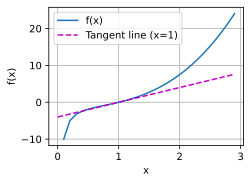

In [23]:
def f(x):
    return x * x * x - 1 / x


x = np.arange(0, 3, 0.1)
plot([x, x], [f(x), 4 * x - 4],
     'x',
     'f(x)',
     legend=['f(x)', 'Tangent line (x=1)'])

## Exercise 7
$$\nabla f(x) = \left[6x_1, 5e^{x_2}\right]^T$$

## Exercise 8
$$\nabla f(x)=\left[\dfrac{x_1}{\|x\|_2}, \dfrac{x_2}{\|x\|_2}, \dots, \dfrac{x_n}{\|x\|_2}\right]^T$$
When $x=0$, there doesn't exist the derivative of $f(x)$ as $\|x\|_2 = 0$.

## Exercise 9
$$\dfrac{\partial u}{\partial a} = \dfrac{\partial u}{\partial x}.\dfrac{\partial x}{\partial a} + \dfrac{\partial u}{\partial y}.\dfrac{\partial y}{\partial a} + \dfrac{\partial u}{\partial z}.\dfrac{\partial z}{\partial a}$$
$$\dfrac{\partial u}{\partial b} = \dfrac{\partial u}{\partial x}.\dfrac{\partial x}{\partial b} + \dfrac{\partial u}{\partial y}.\dfrac{\partial y}{\partial b}+ \dfrac{\partial u}{\partial z}.\dfrac{\partial z}{\partial b}$$

## Exercise 10
$y = f^{-1}(x)$ and $x = f(y)$
$\Rightarrow 1 = f'(y)\dfrac{dy}{dx}$

$\Rightarrow \dfrac{dy}{dx} = \dfrac{1}{f'(f^{-1}(x))}$